<h3>Data Loading</h3>

In [1]:
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<h3>Network Architecture</h3>

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
# Convolution and MaxPooling layers
network.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
network.add(layers.MaxPooling2D(2, 2))
network.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
network.add(layers.MaxPooling2D(2, 2))
# Fully connected layers
network.add(layers.Flatten())
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(10, activation = 'softmax'))

# Compile
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<h3>Data Preprocessing</h3>

In [5]:
import numpy as np

print(np.unique(train_labels))

def one_hot(data, dimension = 10) :
    result = np.zeros((len(data), 10))
    for i, seq in enumerate(data):
        result[i, seq] = 1
    return result

[0 1 2 3 4 5 6 7 8 9]


In [6]:
train_data = train_data.reshape((len(train_data), 28, 28, 1))
train_data = train_data.astype('float32') / 255
train_labels = one_hot(train_labels)

test_data = test_data.reshape((len(test_data), 28, 28, 1))
test_data = test_data.astype('float32') / 255
test_labels = one_hot(test_labels)

<h3>Cross Validation</h3>

In [7]:
x_cval = train_data[:10000]
x_train = train_data[10000:]

y_cval = train_labels[:10000]
y_train = train_labels[10000:]

<h3>Model Training</h3>

In [8]:
results = network.fit(x_train, y_train, epochs = 20, validation_data = (x_cval, y_cval))

Epoch 1/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.4605 - accuracy: 0.8318 - val_loss: 0.3772 - val_accuracy: 0.8510
Epoch 2/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.3050 - accuracy: 0.8872 - val_loss: 0.2921 - val_accuracy: 0.8899
Epoch 3/20
1563/1563 [==============================] - 41s 27ms/step - loss: 0.2600 - accuracy: 0.9047 - val_loss: 0.2858 - val_accuracy: 0.8954
Epoch 4/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.2339 - accuracy: 0.9136 - val_loss: 0.2440 - val_accuracy: 0.9114
Epoch 5/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.2115 - accuracy: 0.9224 - val_loss: 0.2747 - val_accuracy: 0.9046
Epoch 6/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.1940 - accuracy: 0.9283 - val_loss: 0.2632 - val_accuracy: 0.9113
Epoch 7/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.1791 - accuracy: 0.9347 - val_loss: 0.2407 -

In [9]:
History = results.history
History.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<h3>Plotting Training and Validation Loss and Accuracy</h3>

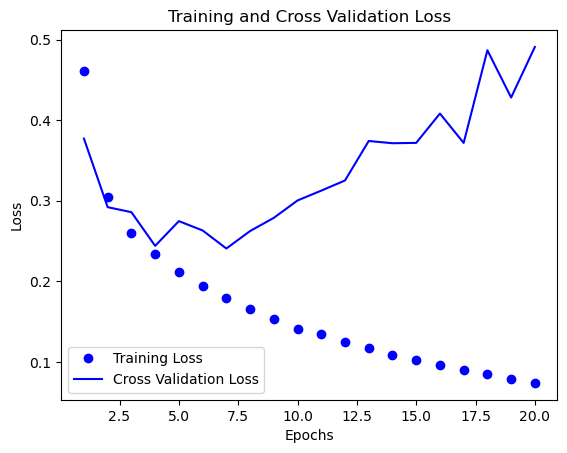

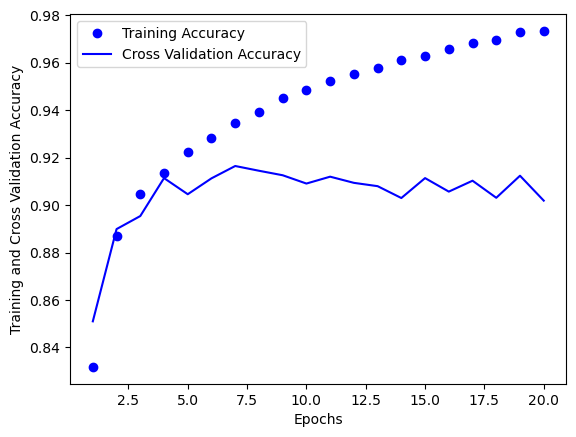

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(History['loss']) + 1)

# Training and Cross Validation Loss
plt.plot(epochs, History['loss'], 'bo', label = 'Training Loss')
plt.plot(epochs, History['val_loss'], 'b', label = 'Cross Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Cross Validation Loss')
plt.legend()

plt.show()
plt.clf()

# Training and Cross Validation Accuracy
plt.plot(epochs, History['accuracy'], 'bo', label = 'Training Accuracy')
plt.plot(epochs, History['val_accuracy'], 'b', label = 'Cross Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and Cross Validation Accuracy')
plt.legend()

plt.show()
plt.clf()

<h3>Retraining the model</h3>

In [11]:
model = models.Sequential()
# Convolution and Pooling layers
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu', input_shape = (28 * 28,)))
model.add(layers.Dense(10, activation = 'softmax'))

# Compile
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit
model.fit(train_data, train_labels, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4403 - accuracy: 0.8383
Epoch 2/8
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2887 - accuracy: 0.8945
Epoch 3/8
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2485 - accuracy: 0.9093
Epoch 4/8
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2219 - accuracy: 0.9186
Epoch 5/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2029 - accuracy: 0.9265
Epoch 6/8
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1865 - accuracy: 0.9321
Epoch 7/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1735 - accuracy: 0.9380
Epoch 8/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1605 - accuracy: 0.9422


<h3>Evaluating on Test data</h3>

In [12]:
test_results = model.evaluate(test_data, test_labels)
test_results

313/313 [==============================] - 2s 7ms/step - loss: 0.2856 - accuracy: 0.9065


[0.28555604815483093, 0.906499981880188]

<h3>Evaluating on Random Fashion images</h3>

In [13]:
(A, B), (C, D) = fashion_mnist.load_data()

In [14]:
def item(idx) :
    if idx == 0:
        return "T-shirt/ Top"
    elif idx == 1:
        return "Trouser"
    elif idx == 2:
        return "Pullover"
    elif idx == 3:
        return "Dress"
    elif idx == 4:
        return "Coat"
    elif idx == 5:
        return "Sandal"
    elif idx == 6:
        return "Shirt"
    elif idx == 7:
        return "Sneaker"
    elif idx == 8:
        return "Bag"
    elif idx == 9:
        return "Ankle boot"
item(1)

'Trouser'

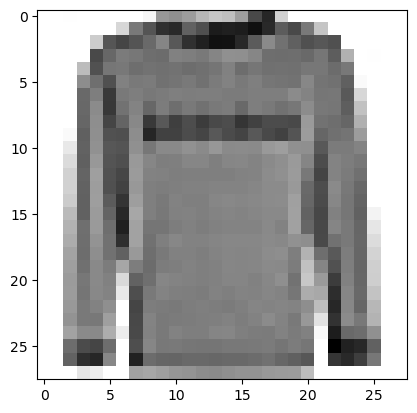

1/1 [==============================] - 0s 98ms/step
The object is Pullover with a probability of 0.999772


<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

X = A[58767]

plt.imshow(X, cmap = plt.cm.binary)
plt.show()

X = X.reshape((1, 28, 28, 1))
X = X.astype('float32') / 255
y = model.predict(X)

y = y.ravel()
pred = np.where(y == y.max())

print("The object is", item(pred[0]), "with a probability of", y.max())

plt.clf()